Raw table summary:


,message_id,channel_username,channel_title,date,text,views,forwards,has_media,image_path,loaded_at
0,256,ethio_medical,️ETHIO_MEDICAL,2022-07-25 03:53:59+00:00,💉 #በህፃናት #ክትባት የምንከላከላቸው 10 ዋና ዋና #በሽታዎች‼️💉\n...,783,19,True,None,2026-01-20 08:48:20.337097+00:00
1,255,ethio_medical,️ETHIO_MEDICAL,2022-07-25 03:53:07+00:00,የህፃናት ማንኮራፋት ችግር (#Snoring) ምክንያቱ ምንድነው❓️\n\n👉...,585,19,True,None,2026-01-20 08:48:20.337097+00:00
2,254,ethio_medical,️ETHIO_MEDICAL,2022-07-25 03:53:07+00:00,#ጨቅላ #ህፃናትን መቼ እና #እንዴት ነው የገላቸውን መታጠብ ያለባቸው⁉\...,687,18,True,None,2026-01-20 08:48:20.337097+00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   message_id        388 non-null    int64              
 1   channel_username  388 non-null    object             
 2   channel_title     388 non-null    object             
 3   date              388 non-null    datetime64[ns, UTC]
 4   text              388 non-null    object             
 5   views             388 non-null    int64              
 6   forwards          388 non-null    int64              
 7   has_media         388 non-null    bool               
 8   image_path        231 non-null    object             
 9   loaded_at         388 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](2), int64(3), object(4)
memory usage: 27.8+ KB
None

Messages per channel:


,channel_username,message_count
0,tikvahpharma,101
1,ethio_medical,100
2,lobelia4cosmetics,100
3,chemed123,76
4,pharmacyethiopia,11


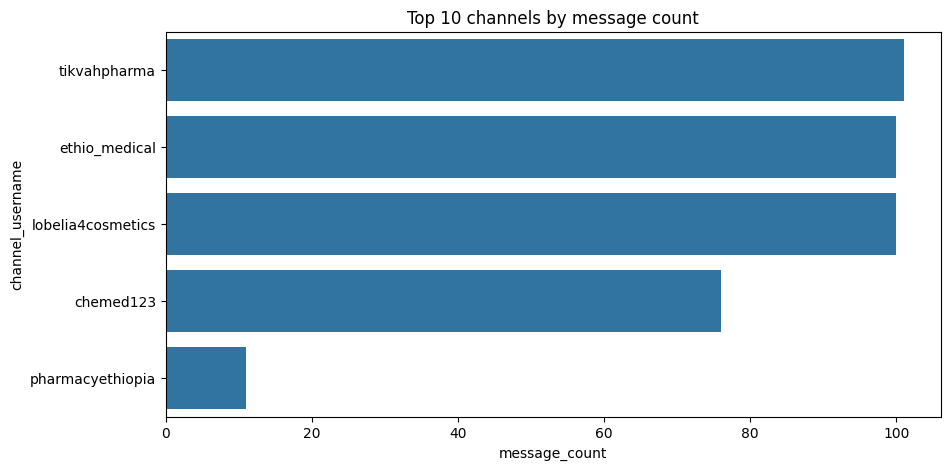


Staging table has 354 rows


In [ ]:
# – Data Exploration – Medical Telegram Warehouse

import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

# ─── Database connection ────────────────────────────────────────────────────────
engine = create_engine(
    f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}"
    f"@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
)

# ─── 1. Check raw table ─────────────────────────────────────────────────────────
print("Raw table summary:")
raw_df = pd.read_sql("SELECT * FROM raw.telegram_messages LIMIT 1000", engine)
display(raw_df.head(3))
print(raw_df.info())

# Message count per channel
channel_counts = pd.read_sql("""
    SELECT channel_username, COUNT(*) as message_count
    FROM raw.telegram_messages
    GROUP BY channel_username
    ORDER BY message_count DESC
""", engine)

print("\nMessages per channel:")
display(channel_counts)

plt.figure(figsize=(10, 5))
sns.barplot(data=channel_counts.head(10), x="message_count", y="channel_username")
plt.title("Top 10 channels by message count")
plt.show()

# ─── 2. Check if staging exists and compare ─────────────────────────────────────
try:
    staging_count = pd.read_sql("SELECT COUNT(*) FROM public_staging.stg_telegram_messages", engine).iloc[0,0]
    print(f"\nStaging table has {staging_count:,} rows")
except:
    print("\nStaging table not yet created or accessible")